In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def LVQ(X,y,n_clusters,learning_rate=0.1):
    #随机选择n_clusters个样本作为p向量
    idx=np.random.choice(X.shape[0],n_clusters)
    p=X[idx,:]
    #获取p的标签
    py=y[idx]
    #画图用
    fig,ax=plt.subplots(3,3,figsize=(12,12),sharex=True,sharey=True)
    j=-1
    for i in range(4501):
        #随机选择一个样本xi
        idx=np.random.choice(X.shape[0],1)
        xi=X[idx,:]
        #计算xi到各个p向量的距离
        dist=np.sqrt(np.sum(np.square(xi-p),axis=1))
        #找到最小距离p向量的索引
        minIdx=np.argmin(dist)
        #如果xi的标签与该向量的标签相等，则靠近，不然就原理
        if y[idx]==py[minIdx]:
            p[minIdx]=p[minIdx]+learning_rate*(xi-p[minIdx])
        else:
            p[minIdx]=p[minIdx]-learning_rate*(xi-p[minIdx])
        #每循环500次画图
        if (i>0) & (i%500==0):
            j+=1
            clusters=[]
            #对于样本里的每一个x，找到它属于哪个类
            for x in X:
                dist=np.sqrt(np.sum(np.square(x-p),axis=1))
                label=np.argmin(dist)
                clusters.append(label)
            if j<3 :
                k=0 
            elif j<6 :
                k=1 
            else: 
                k=2
            ax[k,j%3].scatter(X[:,0],X[:,1],c=clusters)
            ax[k,j%3].scatter(p[:,0],p[:,1],marker='x',color='red',s=100)
            ax[k,j%3].set_title("Iteration: %d" % i)
            ax[k,j%3].set_xlim(xlim)
            ax[k,j % 3].set_ylim(ylim)

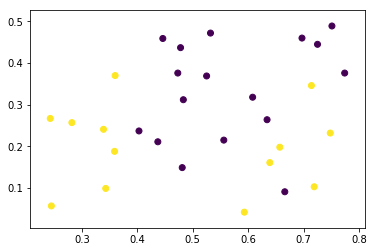

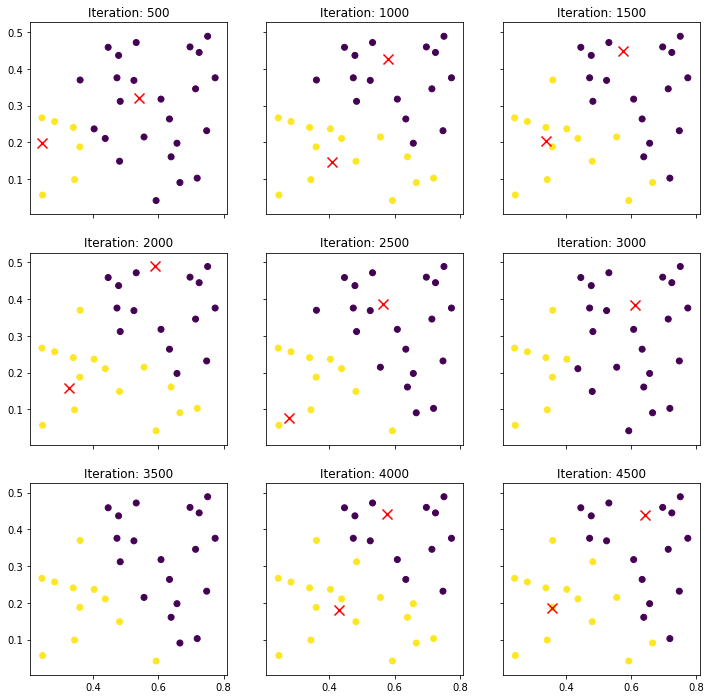

In [5]:
###TEST with watermelon datasets###
data=pd.read_csv('../data/watermelon.csv',header=None)
data['y']=np.zeros((data.shape[0],1),dtype=int)
data.iloc[9:22,2]=1
X=data.iloc[:,:2].values
y=data.iloc[:,2].values

plt.scatter(X[:,0],X[:,1],c=y)
xlim=(plt.axis()[0],plt.axis()[1])
ylim=(plt.axis()[2],plt.axis()[3])

LVQ(X,y,2)

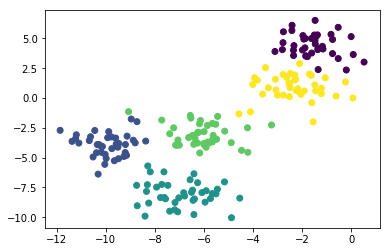

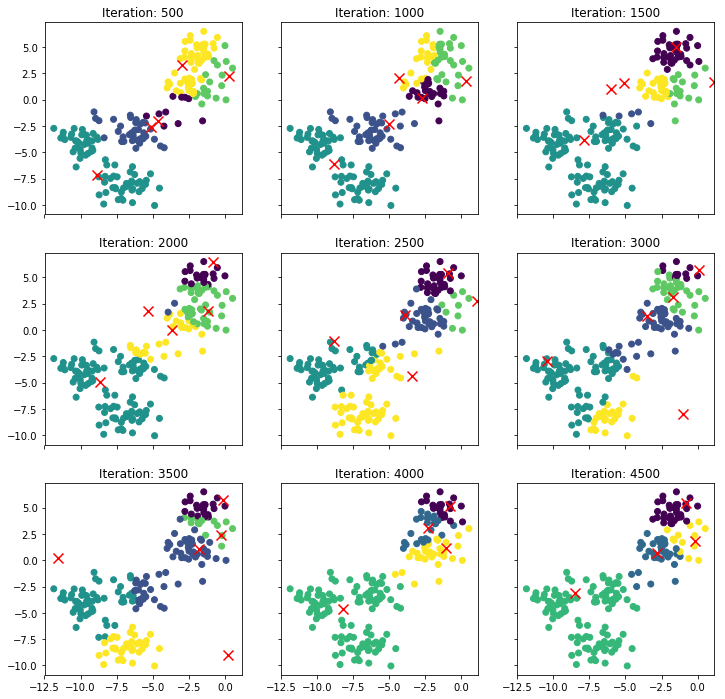

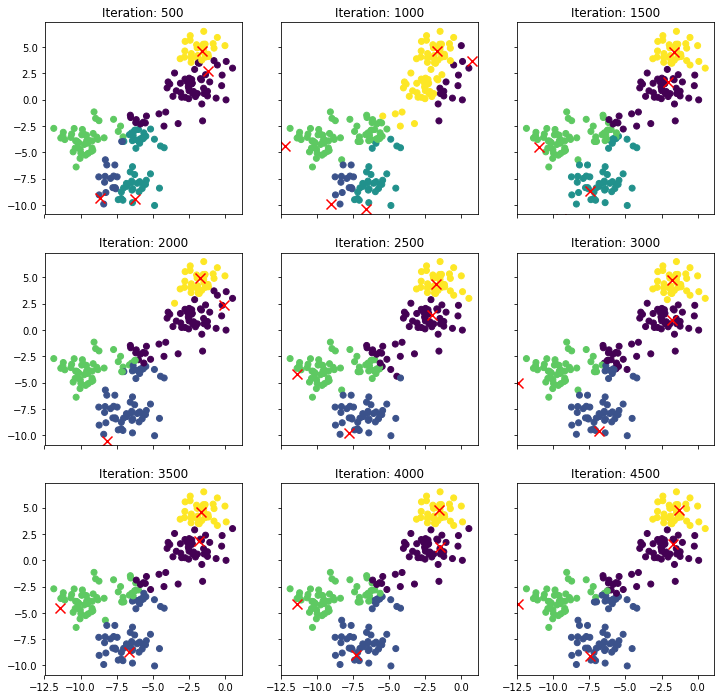

In [4]:
###TEST WITH RANDOM DATASETS###
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=200, n_features=2,centers=5, cluster_std=1.0,random_state=1)
C=np.ones(200)
C[35:145]=0
plt.scatter(X[:,0],X[:,1],c=Y)
xlim=(plt.axis()[0],plt.axis()[1])
ylim=(plt.axis()[2],plt.axis()[3])
###     USing C            ###
LVQ(X,C,n_clusters=5)    
###     USing Y            ###
LVQ(X,Y,n_clusters=5)